In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def calculate_beta_multiple(tickers, market_ticker, start_date, end_date):
    # Download market data
    data = yf.download(tickers + [market_ticker], start=start_date, end=end_date)['Adj Close']
    returns = data.pct_change().dropna()
    
    market_returns = returns[market_ticker]
    
    beta_values = {}
    for ticker in tickers:
        stock_returns = returns[ticker]
        cov_matrix = stock_returns.cov(market_returns)
        beta = cov_matrix / market_returns.var()
        beta_values[ticker] = beta
    
    return pd.DataFrame(beta_values.items(), columns=["Ticker", "Beta"])

# Parameters
tickers = ["AAPL", "MSFT", "TSLA", "AMZN", "GOOGL"]  # Replace with up to 100 tickers
market_ticker = "^GSPC"  # S&P 500
start_date = "2021-10-01"
end_date = "2024-10-01"

# Calculate Beta
beta_df = calculate_beta_multiple(tickers, market_ticker, start_date, end_date)

# Display DataFrame
print(beta_df)


[*********************100%***********************]  6 of 6 completed


  Ticker      Beta
0   AAPL  1.228315
1   MSFT  1.245518
2   TSLA  1.913224
3   AMZN  1.577353
4  GOOGL  1.331559


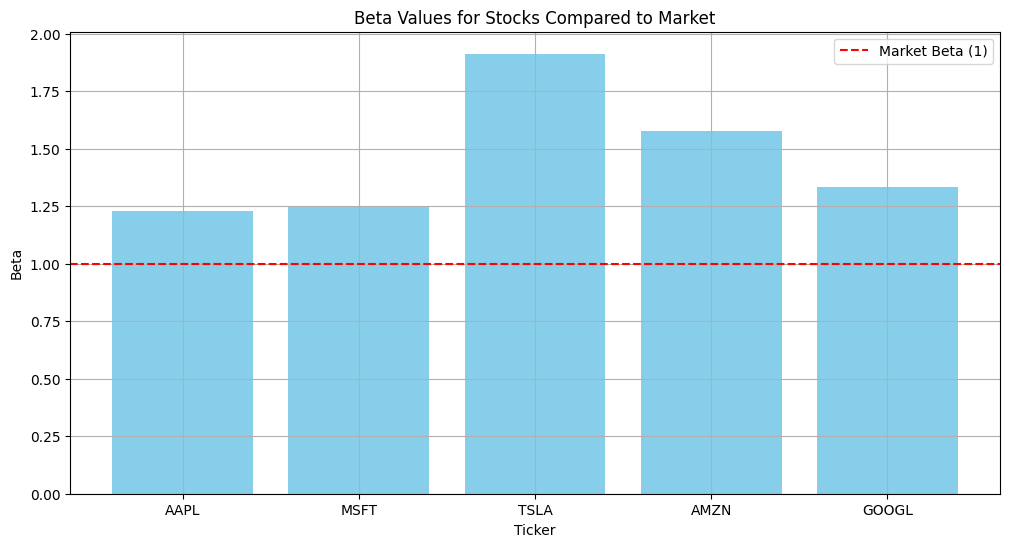

In [5]:
plt.figure(figsize=(12, 6))
plt.bar(beta_df["Ticker"], beta_df["Beta"], color='skyblue')
plt.axhline(1, color='red', linestyle='--', label='Market Beta (1)')
plt.title("Beta Values for Stocks Compared to Market")
plt.xlabel("Ticker")
plt.ylabel("Beta")
plt.legend()
plt.grid(True)
plt.show()


[*********************100%***********************]  6 of 6 completed


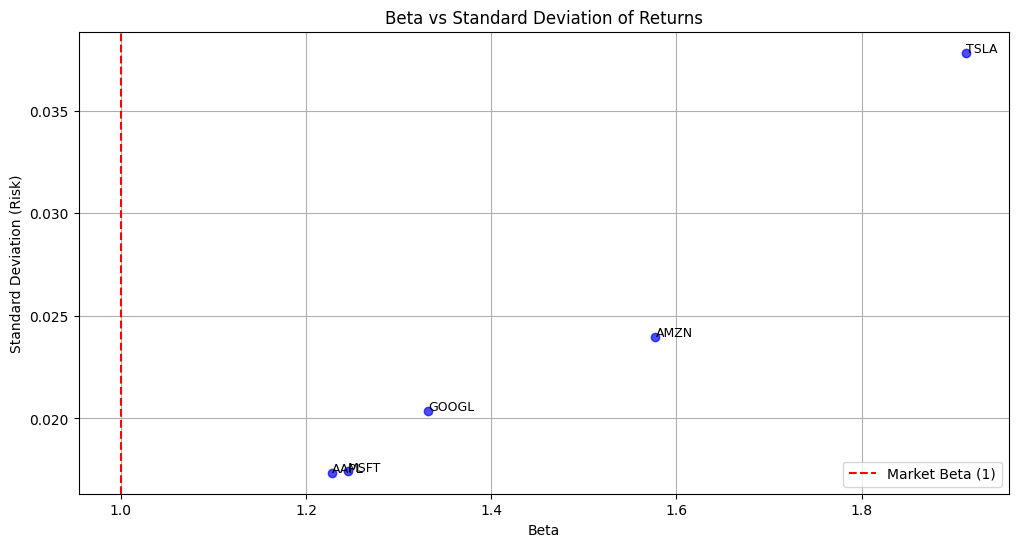

In [8]:
# Calculate Standard Deviation of Returns for each ticker
returns = yf.download(tickers + [market_ticker], start=start_date, end=end_date)['Adj Close'].pct_change().dropna()
std_dev = returns.std()

# Add Standard Deviation to Beta DataFrame
beta_df["Std Dev"] = [std_dev[ticker] for ticker in tickers]

# Scatter Plot
plt.figure(figsize=(12, 6))
plt.scatter(beta_df["Beta"], beta_df["Std Dev"], color='blue', alpha=0.7)
for i, row in beta_df.iterrows():
    plt.text(row["Beta"], row["Std Dev"], row["Ticker"], fontsize=9)

plt.axvline(1, color='red', linestyle='--', label='Market Beta (1)')
plt.title("Beta vs Standard Deviation of Returns")
plt.xlabel("Beta")
plt.ylabel("Standard Deviation (Risk)")
plt.legend()
plt.grid(True)
plt.show()
